***Challange*** 
### HardWork Pays Off

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#### section 1: Load and visualize the Data (Data Prepration)
- Download
- Load
- Visualize
- Normalisation

In [5]:
# we have downloaded the train and test data set from the challange
# we will use pandas to load the data set
X = pd.read_csv("/Users/sanjeevkumar/DScodingBlocks/Linear_regression/Training Data/Linear_X_Train.csv")
Y = pd.read_csv("/Users/sanjeevkumar/DScodingBlocks/Linear_regression/Training Data/Linear_Y_Train.csv")

# converting X, Y to numpy arrays using dol(.) property, (first checked type of data of X,Y by print(type(X)))
X = X.values
Y = Y.values

print(X.shape)
print(Y.shape)

(3750, 1)
(3750, 1)


In [6]:
# Normalisation : when we do normailisation we normalize the x values not y values
# the way to do normalisation is we will subtract the mean and divide by the standard deviation
u = X.mean()
std = X.std()
X = (X-u)/std
print(u,std) #you will se std is close to 1 means data is normalised (we check if data is already normalized or not)

-0.03779466168006854 0.9920801322508517


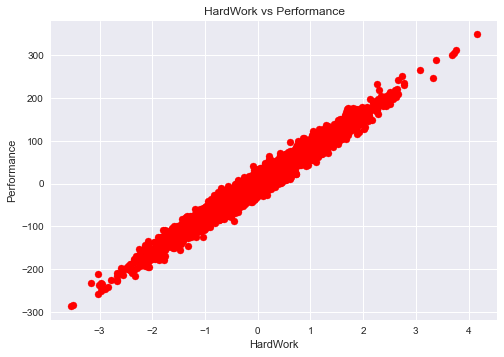

In [7]:
# Visualisation

# we have loaded the data, now we can go to next step 
# for visualizing we will use matplotlib, in which we will use 'scatter-plot' between x and y
plt.style.use('seaborn')  # we will use seaborn style for plotting
plt.scatter(X,Y,color = 'red')
plt.title("HardWork vs Performance")
plt.xlabel("HardWork")
plt.ylabel("Performance")
plt.show()

### section 2 : Linear Regression

In [8]:
def hypothesis(x, theta):   # Y_ means y-cap
# remember theta = [theta0, theta1]
    y_ = theta[0] + theta[1]*x
    return y_


def gradient(X,Y,theta):  # X, Y denotes entire data set
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    
    return grad/m
        
    

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
    return total_error/m



def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        
        # compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        # update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        return theta,error_list

In [9]:
theta, error_list = gradientDescent(X,Y)

In [10]:
theta

array([0.0683869 , 7.99057369])

In [11]:
error_list

[array([6576.35005246])]

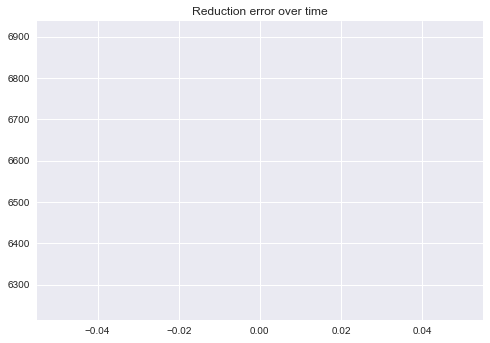

In [12]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

## predictions and best line

In [13]:
y_ = hypothesis(X, theta)
print(y_)

[[-1.95738818]
 [-4.36968779]
 [ 8.64871733]
 ...
 [-2.08510009]
 [13.87056574]
 [-3.58799256]]


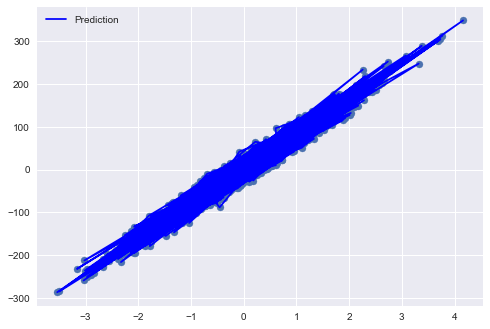

In [14]:
# training + Predictions
plt.scatter(X,Y)
plt.plot(X,Y,color='blue',label='Prediction')
plt.legend()
plt.show()

In [15]:
# load the test data
X_test = pd.read_csv("Test Cases (1)/Linear_X_Test.csv")
y_test = hypothesis(X_test,theta)




In [16]:
df = pd.DataFrame(data=y_test, columns=['y'])

In [17]:
df.to_csv('y_predictions.csv',index=False)

## computing score
* score : R2(R-squared) or cofficient of Datermination


In [18]:
def r2_score(Y, Y_):
    # Instead of Loop, np.sum is recommended as it is fast 
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1-num/denom)
    return score*100


In [22]:
r2_score(Y,y_)

18.442502524128766

## Visualising Loss function, Gradient Descent, Theta updates

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [30]:
theta

array([0.0683869 , 7.99057369])

In [38]:
# Loss Actually
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0, T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)

print(T0)
print(T1)

[[-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 ...
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]]
[[ 40  40  40 ...  40  40  40]
 [ 41  41  41 ...  41  41  41]
 [ 42  42  42 ...  42  42  42]
 ...
 [117 117 117 ... 117 117 117]
 [118 118 118 ... 118 118 118]
 [119 119 119 ... 119 119 119]]


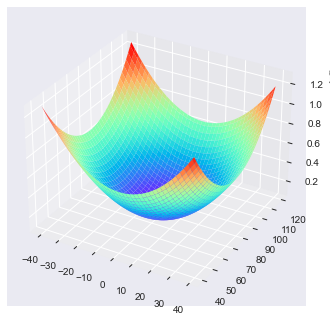

In [42]:
# visualize the j loss
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

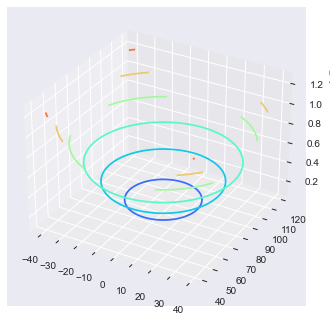

In [44]:
# contor plot
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()